In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#setting the path for data set import
path = r'/Users/davesmac/Desktop/Achievement 6'

In [3]:
df_routes = pd.read_excel(os.path.join(path, 'Data' , 'climbing_routes_clean.xlsx'))

In [4]:
df_routes.head()

,Unnamed: 0,Route_Name,Location,Area,Region,State,Avg Stars,Route_Type,Route_Subtype,Rating,Rating_Subtype,Pitches,Length,Latitude,Longitude,Coordinates,URL,Rating Category,Length Category
0,0,What's My Line?,Cochise Dome (What's My Line Dome) > East Stro...,Cochise Stronghold,Southern Arizona,Arizona,3.7,Trad,Aid,6,A0 R,3,400.0,31.92900,-109.98167,"('31.929', '-109.98167')",https://www.mountainproject.com/route/10573837...,Easy Route,Medium Route
1,1,Hanging Gardens,Gardener's Wall > McDowell Mountains > **Phoen...,**Phoenix Areas,Central Arizona,Arizona,3.3,Trad,None,6,NaN,2,NaN,33.68178,-111.80737,"('33.68178', '-111.80737')",https://www.mountainproject.com/route/10587937...,Easy Route,NaN
2,2,East Face,The Praying Monk > Camelback Mountain > **Phoe...,**Phoenix Areas,Central Arizona,Arizona,3.0,Sport,None,6,NaN,1,80.0,33.51450,-111.96180,"('33.5145', '-111.9618')",https://www.mountainproject.com/route/10580135...,Easy Route,Short Route
3,3,Southeast Arete,East Face > Baboquivari Peak > Southern Arizon...,Baboquivari Peak,Southern Arizona,Arizona,3.3,Trad,None,6,NaN,6,NaN,31.77129,-111.59357,"('31.77129', '-111.59357')",https://www.mountainproject.com/route/10614707...,Easy Route,NaN
4,4,Razor's Edge,The Hand > Northwest Pinnacles > Superstition ...,**Phoenix Areas,Central Arizona,Arizona,2.7,Trad,None,6,NaN,3,250.0,33.45235,-111.45936,"('33.45235', '-111.45936')",https://www.mountainproject.com/route/10580806...,Easy Route,Medium Route


In [5]:
#create subset w/variables for heatmap
heatmap_cols = df_routes[["Latitude", "Longitude", "Rating", "Avg Stars", "Pitches", "Length"]]

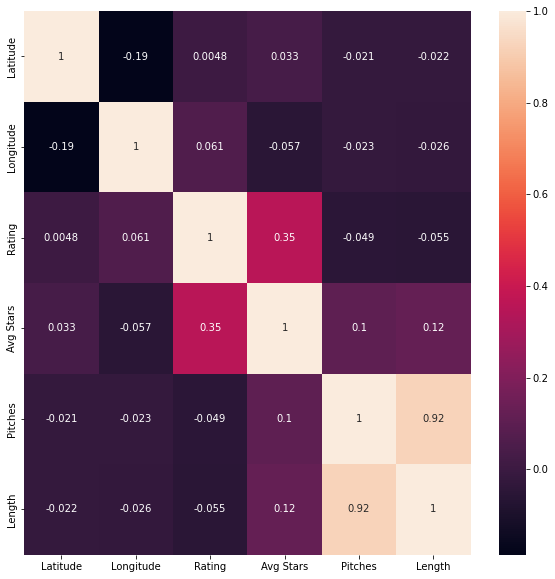

In [6]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(heatmap_cols.corr(), annot = True, ax = ax)

#### There appears to be a moderate positive correlation between rating and avg stars.  This makes sense from my own experience, in which more difficult routes typically receive more stars. There is also a very strong positive correlation between pitches and length. This makes sense because typically, the more pitches a route has, the longer it is. I also see a weak positive correlation between route length and avg stars. That tells me that there may be a slight preference towards longer routes amongst climbers.


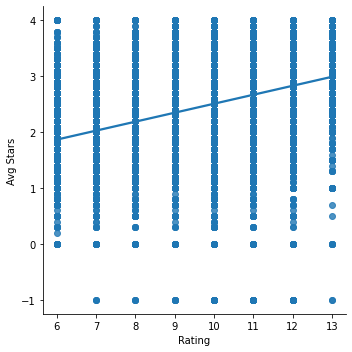

In [7]:
# Create scatterplot for avg stars and rating
sns.lmplot(x = 'Rating', y = 'Avg Stars', data = df_routes)

#### As stated, there is a positive correlation between avg stars and difficulty. This means that the harder the route, the more stars it gets (meaning higher quality, more fun, etc.)

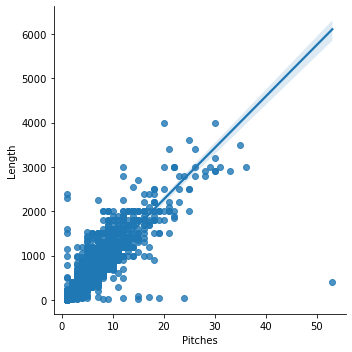

In [8]:
# Create scatterplot for pitches and length
sns.lmplot(x = 'Pitches', y = 'Length', data = df_routes)

#### Here we see a very strong positive correlation between the number of pitches and how long a route is (the more pitches, the longer the route). There are a few outliers to this, but I attribute that to faulty data.  

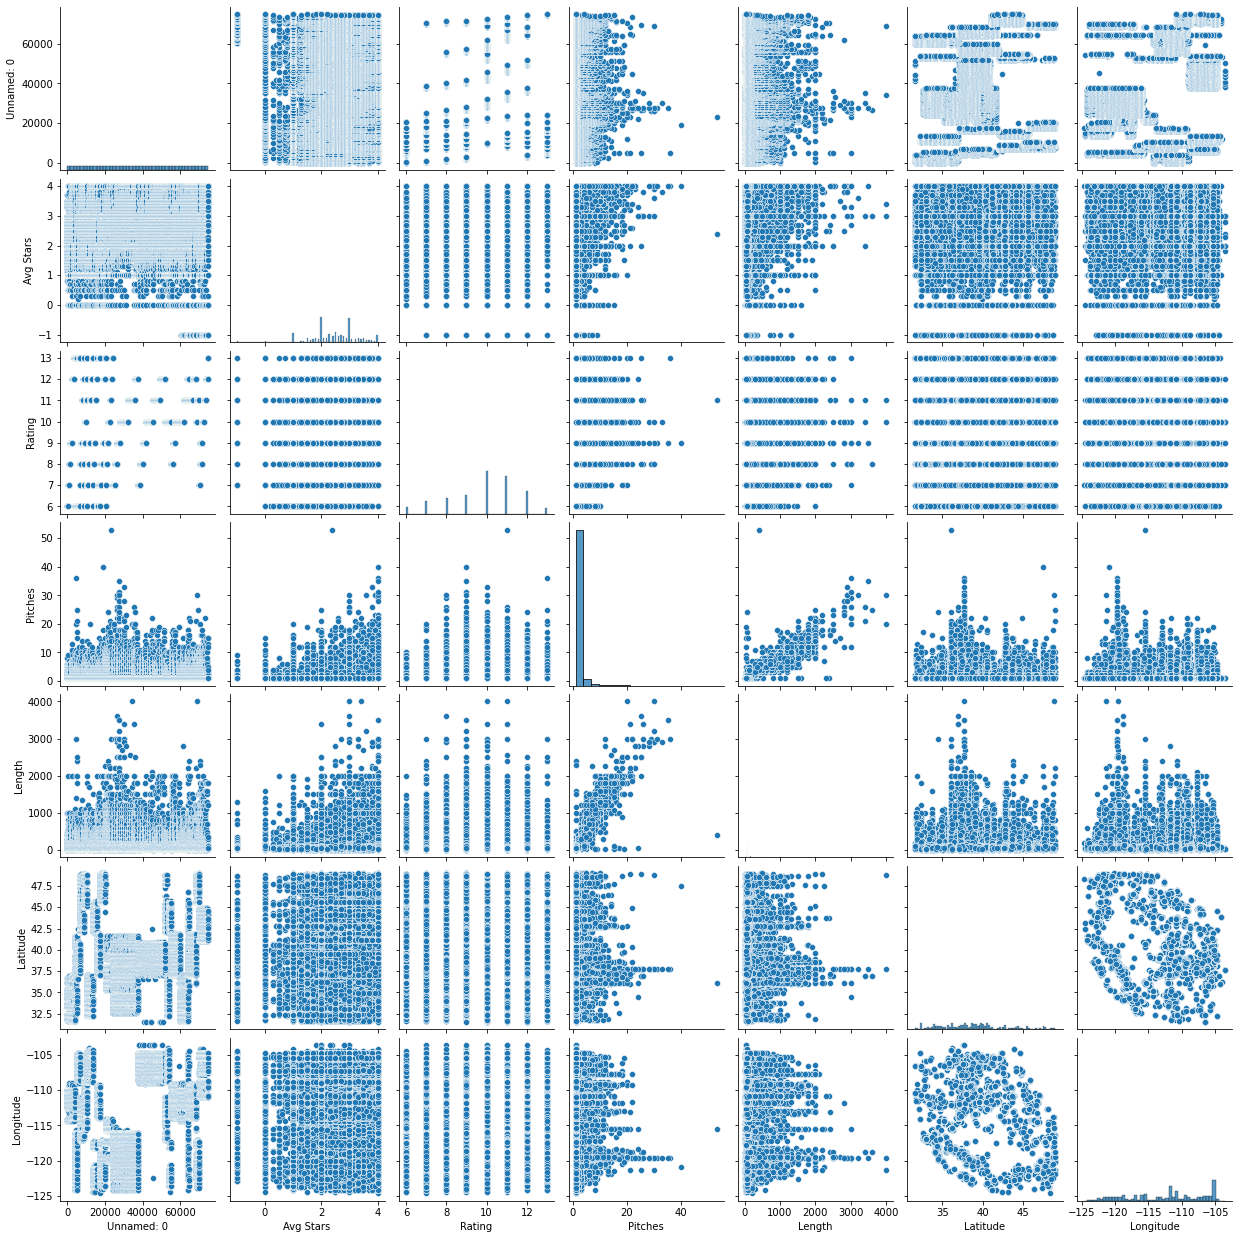

In [9]:
#Create pair plot of entire df_routes
pairplot = sns.pairplot(df_routes)

#### I would like to further explore the relationships between avg stars and difficulty because it could help to answer my questions regarding where to climb based on difficulty. If I am seeking an area with a lot of routes of a given difficulty, I'd also like them to be high quality, meaning having more stars. 

#### I'd also like to look at avg stars and pitches and/or length.  It seems as though the longer the route, the more stars it generally gets- which could be valuable analysis for when determining where to climb. 

#### The relationship between pitches and lat/long is also quiet interesting- it seems that at a certain lat (around 38) and long (-120), there are routes with many more pitches than elsewhere. I would assume that this is due to that location being in an area with larger mountains/big walls (i.e. Yosemite, Sierra Nevada, Rocky Mountains). 

In [10]:
#Assigning Easy Route Category 
df_routes.loc[df_routes['Rating'] <10, 'Rating Category'] = 'Easy Route'

In [11]:
#Assigning Intermediate Route Category 
df_routes.loc[(df_routes['Rating'] >=10) & (df_routes['Rating'] <12), 'Rating Category'] = 'Intermediate Route'

In [12]:
#Assigning Hard Route Category 
df_routes.loc[df_routes['Rating'] >=12, 'Rating Category'] = 'Hard Route'

In [13]:
df_routes['Rating Category'].value_counts(dropna = False)

Intermediate Route    36930
Easy Route            24655
Hard Route            13101
Name: Rating Category, dtype: int64

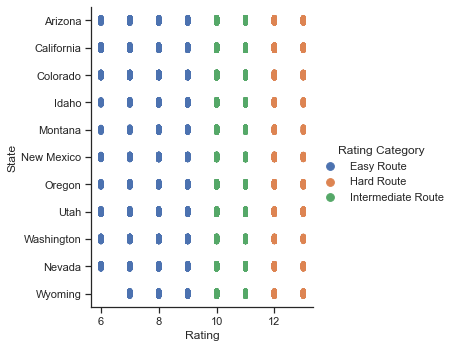

In [14]:
#Create categorical plot using rating categories defined above
sns.set(style="ticks")
catplot_rating = sns.catplot(x="Rating", y="State", hue="Rating Category", data=df_routes)

#### The categorical plot shows a pretty even distribution of route difficulty accross all western states.  

In [15]:
#Assigning "Short Route" Category 
df_routes.loc[df_routes['Length'] <200, 'Length Category'] = 'Short Route'

In [20]:
#Assigning "Medium Route" Category 
df_routes.loc[(df_routes['Length'] >=200) & (df_routes['Length'] <1400), 'Length Category'] = 'Medium Route'

In [21]:
#Assigning "Long Route" Category 
df_routes.loc[(df_routes['Length'] >=1400), 'Length Category'] = 'Long Route'

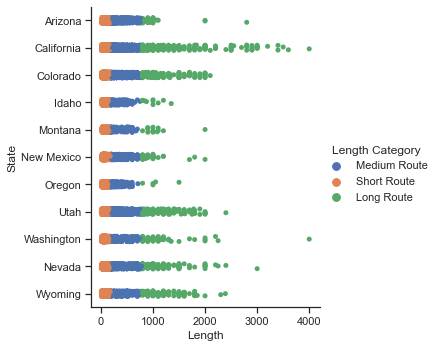

In [18]:
#Create categorical plot using rating categories defined above
sns.set(style="ticks")
catplot_length = sns.catplot(x="Length", y="State", hue="Length Category", data=df_routes)

In [27]:
#Assigning "Bad Route" Category 
df_routes.loc[df_routes['Avg Stars'] <1, 'Route Quality'] = 'Bad Route'

In [28]:
#Assigning "Ok Route" Category 
df_routes.loc[(df_routes['Avg Stars'] >=1) & (df_routes['Avg Stars'] <2), 'Route Quality'] = 'Ok Route'

In [29]:
#Assigning "Good Route" Category 
df_routes.loc[(df_routes['Avg Stars'] >=2) & (df_routes['Avg Stars'] <3), 'Route Quality'] = 'Good Route'

In [30]:
#Assigning "Great Route" Category 
df_routes.loc[(df_routes['Avg Stars'] >=3) , 'Route Quality'] = 'Great Route'

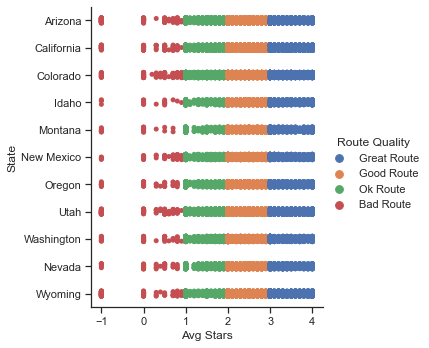

In [31]:
#Create categorical plot using quality categories defined above
sns.set(style="ticks")
catplot_length = sns.catplot(x="Avg Stars", y="State", hue="Route Quality", data=df_routes)

#### This categorical plot shows the distribution of route lengths by state.  There is a fairly even distribution of short and medium routes across all western states, however quite a discrepency of long routes. California has by far the most long routes, followed by Colorado, Utah, and Nevada.  

### Project Questions that have been answered: 

#### •	What States, Regions, Areas have the overall most climbing routes?- So far I have seen that CA, UT, and CO have the overall most routes. I need to look into Regions and Areas still.

#### •  How many routes of each difficulty are there in each State/Region/Area?- While I don't have exact numbers yet, I do see a pretty even distribution so far. 

### New Questions based on findings: 

#### • What is the relationship between a routes length and the number of stars it receives? 

### Hypotheses: 

#### The harder/more difficult a route, the more stars on average it will receive.

#### Longer routes tend to receive more stars



### One other note: 

#### Not only did I find these visualizations useful for analysis and finding trends/correlations, I was also quickly able to see that my data needed some additional cleaning. For example, the first time I ran a heat map, there was no correlation between route length and number of pitches. I thought this strange and went back to look at the length data. I found many errors and dirty data. Once I cleaned that variable up more, a strong postive correlation emmerged. 

In [32]:
df_routes.to_excel(os.path.join(path, 'climbing_routes_clean.xlsx'))